In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train= []
y_train=[]
dirc= 'train'
#creating labels
labels = ['cats','dogs']
for label in tqdm(labels):
    label_num= labels.index(label) # labels encoding
    path = os.path.join(dirc,label) # creating a path for each label 
    for img in os.listdir(path): # after creating a path we create a list of all image in each path/folder
        image_array = cv.imread(os.path.join(path,img)) # reading the images in each folder by using for loop
        image_resize= cv.resize(image_array,(150,150))
        X_train.append(image_resize)
        y_train.append(label_num)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.34it/s]


In [3]:
X_test= []
y_test=[]
dirc= 'test'
#creating labels
labels = ['cats','dogs']
for label in tqdm(labels):
    label_num= labels.index(label) # labels encoding
    path = os.path.join(dirc,label) # creating a path for each label 
    for img in os.listdir(path): # after creating a path we create a list of all image in each path/folder
        image_array = cv.imread(os.path.join(path,img)) # reading the images in each folder by using for loop
        image_resize= cv.resize(image_array,(150,150))
        X_test.append(image_resize)
        y_test.append(label_num)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.27it/s]


In [4]:
X_train=np.asarray(X_train) #Converting to a numpy array
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test=np.asarray(y_test)

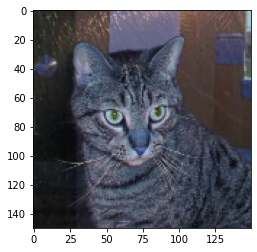

In [5]:
plt.imshow(X_train[0])
plt.show()

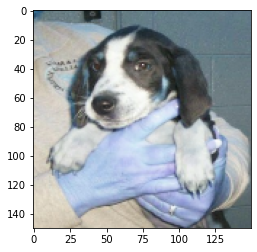

In [6]:
plt.imshow(X_train[21])
plt.show()

In [7]:
print(X_train.shape)
print(X_test.shape)

(40, 150, 150, 3)
(20, 150, 150, 3)


In [8]:
print(y_train.shape)
print(y_test.shape)

(40,)
(20,)


In [9]:
X_train_scaled = X_train/255
X_test_scaled  = X_test/255 

In [10]:
model = Sequential()
#Convolutional layer 1 with 32 filters of kernel size[5,5] 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation ='relu', input_shape= (150,150,3)))
#Pooling layer 1 with pool size[2,2] and stride 
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
#Convolutional layer 2 with 64 filters of kernel size[5,5]
model.add(Conv2D(filters=64, kernel_size=(5,5), activation ='relu'))
#Pooling layer 2 with pool size[2,2] and stride 2
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
#Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
model.add(Dense(32,activation='relu'))
#Dropout layer with dropout probability 0.4
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 34, 34, 32)        2080      
                                                                 
 dropout (Dropout)           (None, 34, 34, 32)        0

# For the training step, define the loss function and minimize it 

In [12]:
sgd_opt = tf.keras.optimizers.SGD(learning_rate = 0.001)

In [13]:
model.compile(loss='binary_crossentropy', optimizer=sgd_opt, metrics=['accuracy'])

# For the evaluation step, calculate the accuracy 
# Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data.

In [14]:
hist1 = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
2/2 [==============================] - 3s 716ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 450ms/step - loss: 0.7042 - accuracy: 0.5000 - val_loss: 0.6883 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 1s 444ms/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 1s 436ms/step - loss: 0.6977 - accuracy: 0.5000 - val_loss: 0.6883 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 1s 464ms/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 1s 448ms/step - loss: 0.6916 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 1s 450ms/step - loss: 0.7040 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 8/100
2

Epoch 59/100
2/2 [==============================] - 1s 466ms/step - loss: 0.6841 - accuracy: 0.5000 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 60/100
2/2 [==============================] - 1s 457ms/step - loss: 0.6732 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 61/100
2/2 [==============================] - 1s 442ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 62/100
2/2 [==============================] - 1s 463ms/step - loss: 0.6809 - accuracy: 0.5000 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 63/100
2/2 [==============================] - 1s 545ms/step - loss: 0.6667 - accuracy: 0.5000 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 64/100
2/2 [==============================] - 1s 490ms/step - loss: 0.6641 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 65/100
2/2 [==============================] - 1s 461ms/step - loss: 0.6813 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 

In [15]:
test_loss, test_accuracy = model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 168ms/step - loss: 0.6922 - accuracy: 0.5000


In [16]:
test_loss

0.6922260522842407

In [17]:
test_accuracy

0.5

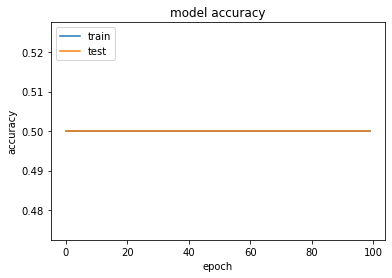

In [18]:
# summarize history for accuracy
plt.plot(hist1.history['val_accuracy'])
plt.plot(hist1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

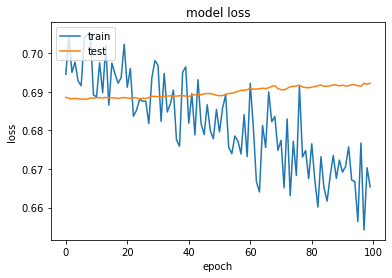

In [19]:
# summarize history for loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
hist2 = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_test_scaled, y_test))

Epoch 1/200
2/2 [==============================] - 1s 526ms/step - loss: 0.6750 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 1s 464ms/step - loss: 0.6648 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 1s 494ms/step - loss: 0.6728 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 1s 476ms/step - loss: 0.6711 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 1s 503ms/step - loss: 0.6716 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 1s 479ms/step - loss: 0.6500 - accuracy: 0.5000 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 1s 468ms/step - loss: 0.6603 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 8/200
2

Epoch 59/200
2/2 [==============================] - 2s 541ms/step - loss: 0.6256 - accuracy: 0.5000 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 60/200
2/2 [==============================] - 2s 562ms/step - loss: 0.6218 - accuracy: 0.5000 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 61/200
2/2 [==============================] - 2s 558ms/step - loss: 0.6185 - accuracy: 0.5000 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 62/200
2/2 [==============================] - 2s 579ms/step - loss: 0.6270 - accuracy: 0.5000 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 63/200
2/2 [==============================] - 2s 552ms/step - loss: 0.6398 - accuracy: 0.5000 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 64/200
2/2 [==============================] - 2s 574ms/step - loss: 0.6109 - accuracy: 0.5000 - val_loss: 0.6991 - val_accuracy: 0.5000
Epoch 65/200
2/2 [==============================] - 2s 558ms/step - loss: 0.6239 - accuracy: 0.5000 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 

2/2 [==============================] - 2s 530ms/step - loss: 0.5392 - accuracy: 0.5000 - val_loss: 0.7136 - val_accuracy: 0.5000
Epoch 117/200
2/2 [==============================] - 2s 528ms/step - loss: 0.5616 - accuracy: 0.5000 - val_loss: 0.7086 - val_accuracy: 0.5000
Epoch 118/200
2/2 [==============================] - 2s 558ms/step - loss: 0.5452 - accuracy: 0.5000 - val_loss: 0.7067 - val_accuracy: 0.5000
Epoch 119/200
2/2 [==============================] - 2s 558ms/step - loss: 0.5658 - accuracy: 0.5000 - val_loss: 0.7059 - val_accuracy: 0.5000
Epoch 120/200
2/2 [==============================] - 2s 514ms/step - loss: 0.5532 - accuracy: 0.5000 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 121/200
2/2 [==============================] - 2s 542ms/step - loss: 0.5274 - accuracy: 0.5000 - val_loss: 0.7059 - val_accuracy: 0.5000
Epoch 122/200
2/2 [==============================] - 2s 535ms/step - loss: 0.5220 - accuracy: 0.5000 - val_loss: 0.7069 - val_accuracy: 0.5000
Epoch 123/200

2/2 [==============================] - 2s 568ms/step - loss: 0.4923 - accuracy: 0.5000 - val_loss: 0.7177 - val_accuracy: 0.5000
Epoch 174/200
2/2 [==============================] - 2s 549ms/step - loss: 0.4630 - accuracy: 0.5000 - val_loss: 0.7077 - val_accuracy: 0.5000
Epoch 175/200
2/2 [==============================] - 2s 554ms/step - loss: 0.5017 - accuracy: 0.5000 - val_loss: 0.7038 - val_accuracy: 0.5000
Epoch 176/200
2/2 [==============================] - 2s 622ms/step - loss: 0.4614 - accuracy: 0.5000 - val_loss: 0.7070 - val_accuracy: 0.5000
Epoch 177/200
2/2 [==============================] - 2s 567ms/step - loss: 0.4448 - accuracy: 0.5000 - val_loss: 0.7004 - val_accuracy: 0.5000
Epoch 178/200
2/2 [==============================] - 2s 551ms/step - loss: 0.4793 - accuracy: 0.5000 - val_loss: 0.7122 - val_accuracy: 0.5000
Epoch 179/200
2/2 [==============================] - 2s 574ms/step - loss: 0.4943 - accuracy: 0.5000 - val_loss: 0.7156 - val_accuracy: 0.5000
Epoch 180/200

In [21]:
test_loss, test_accuracy = model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 192ms/step - loss: 0.7044 - accuracy: 0.5000


In [22]:
test_loss

0.7043887376785278

In [23]:
test_accuracy

0.5

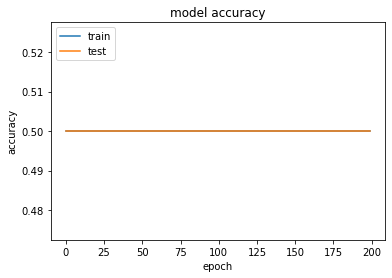

In [24]:
# summarize history for accuracy
plt.plot(hist2.history['val_accuracy'])
plt.plot(hist2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

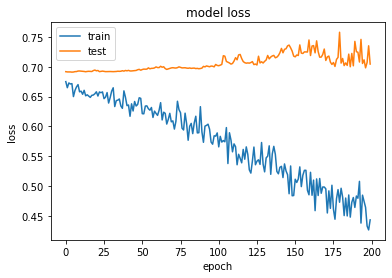

In [25]:
# summarize history for loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
hist3 = model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_test_scaled, y_test))

Epoch 1/300
2/2 [==============================] - 2s 624ms/step - loss: 0.4160 - accuracy: 0.5000 - val_loss: 0.7062 - val_accuracy: 0.5000
Epoch 2/300
2/2 [==============================] - 2s 524ms/step - loss: 0.4461 - accuracy: 0.5000 - val_loss: 0.7076 - val_accuracy: 0.5000
Epoch 3/300
2/2 [==============================] - 2s 556ms/step - loss: 0.4841 - accuracy: 0.5000 - val_loss: 0.7426 - val_accuracy: 0.5000
Epoch 4/300
2/2 [==============================] - 2s 537ms/step - loss: 0.4554 - accuracy: 0.5000 - val_loss: 0.7102 - val_accuracy: 0.5000
Epoch 5/300
2/2 [==============================] - 2s 582ms/step - loss: 0.4388 - accuracy: 0.5000 - val_loss: 0.7289 - val_accuracy: 0.5000
Epoch 6/300
2/2 [==============================] - 2s 570ms/step - loss: 0.4398 - accuracy: 0.5000 - val_loss: 0.7160 - val_accuracy: 0.5000
Epoch 7/300
2/2 [==============================] - 2s 547ms/step - loss: 0.4641 - accuracy: 0.5000 - val_loss: 0.7332 - val_accuracy: 0.5000
Epoch 8/300
2

Epoch 59/300
2/2 [==============================] - 2s 565ms/step - loss: 0.3504 - accuracy: 0.5000 - val_loss: 0.7117 - val_accuracy: 0.5000
Epoch 60/300
2/2 [==============================] - 2s 559ms/step - loss: 0.3739 - accuracy: 0.5000 - val_loss: 0.7121 - val_accuracy: 0.5000
Epoch 61/300
2/2 [==============================] - 2s 557ms/step - loss: 0.3528 - accuracy: 0.5000 - val_loss: 0.7105 - val_accuracy: 0.5000
Epoch 62/300
2/2 [==============================] - 2s 549ms/step - loss: 0.3888 - accuracy: 0.5000 - val_loss: 0.7400 - val_accuracy: 0.5000
Epoch 63/300
2/2 [==============================] - 2s 549ms/step - loss: 0.3669 - accuracy: 0.5000 - val_loss: 0.7352 - val_accuracy: 0.5000
Epoch 64/300
2/2 [==============================] - 2s 579ms/step - loss: 0.3947 - accuracy: 0.5000 - val_loss: 0.7137 - val_accuracy: 0.5000
Epoch 65/300
2/2 [==============================] - 2s 572ms/step - loss: 0.3747 - accuracy: 0.5000 - val_loss: 0.7091 - val_accuracy: 0.5000
Epoch 

2/2 [==============================] - 2s 550ms/step - loss: 0.2900 - accuracy: 0.5000 - val_loss: 0.7230 - val_accuracy: 0.5000
Epoch 117/300
2/2 [==============================] - 2s 555ms/step - loss: 0.2800 - accuracy: 0.5000 - val_loss: 0.7835 - val_accuracy: 0.5000
Epoch 118/300
2/2 [==============================] - 2s 544ms/step - loss: 0.2846 - accuracy: 0.5000 - val_loss: 0.7285 - val_accuracy: 0.5000
Epoch 119/300
2/2 [==============================] - 2s 557ms/step - loss: 0.2558 - accuracy: 0.5000 - val_loss: 0.7203 - val_accuracy: 0.5000
Epoch 120/300
2/2 [==============================] - 2s 563ms/step - loss: 0.2946 - accuracy: 0.5000 - val_loss: 0.8293 - val_accuracy: 0.5000
Epoch 121/300
2/2 [==============================] - 2s 537ms/step - loss: 0.4041 - accuracy: 0.5000 - val_loss: 0.7186 - val_accuracy: 0.5000
Epoch 122/300
2/2 [==============================] - 2s 587ms/step - loss: 0.3056 - accuracy: 0.5000 - val_loss: 0.8564 - val_accuracy: 0.5000
Epoch 123/300

2/2 [==============================] - 1s 463ms/step - loss: 0.1961 - accuracy: 0.5000 - val_loss: 0.7711 - val_accuracy: 0.5000
Epoch 174/300
2/2 [==============================] - 1s 428ms/step - loss: 0.2553 - accuracy: 0.5000 - val_loss: 0.7984 - val_accuracy: 0.5000
Epoch 175/300
2/2 [==============================] - 1s 451ms/step - loss: 0.1931 - accuracy: 0.5000 - val_loss: 0.7612 - val_accuracy: 0.5000
Epoch 176/300
2/2 [==============================] - 1s 489ms/step - loss: 0.2088 - accuracy: 0.5000 - val_loss: 0.7622 - val_accuracy: 0.5000
Epoch 177/300
2/2 [==============================] - 3s 2s/step - loss: 0.1875 - accuracy: 0.5000 - val_loss: 0.8359 - val_accuracy: 0.5000
Epoch 178/300
2/2 [==============================] - 6s 2s/step - loss: 0.3447 - accuracy: 0.5000 - val_loss: 0.8435 - val_accuracy: 0.5000
Epoch 179/300
2/2 [==============================] - 1s 440ms/step - loss: 0.2668 - accuracy: 0.5000 - val_loss: 0.7513 - val_accuracy: 0.5000
Epoch 180/300
2/2 [

2/2 [==============================] - 1s 482ms/step - loss: 0.2435 - accuracy: 0.5000 - val_loss: 0.8380 - val_accuracy: 0.5000
Epoch 231/300
2/2 [==============================] - 1s 466ms/step - loss: 0.2461 - accuracy: 0.5000 - val_loss: 0.8301 - val_accuracy: 0.5000
Epoch 232/300
2/2 [==============================] - 1s 464ms/step - loss: 0.2278 - accuracy: 0.5000 - val_loss: 0.8091 - val_accuracy: 0.5000
Epoch 233/300
2/2 [==============================] - 1s 465ms/step - loss: 0.1737 - accuracy: 0.5000 - val_loss: 0.8374 - val_accuracy: 0.5000
Epoch 234/300
2/2 [==============================] - 1s 467ms/step - loss: 0.2353 - accuracy: 0.5000 - val_loss: 0.8825 - val_accuracy: 0.5000
Epoch 235/300
2/2 [==============================] - 1s 456ms/step - loss: 0.1894 - accuracy: 0.5000 - val_loss: 0.8420 - val_accuracy: 0.5000
Epoch 236/300
2/2 [==============================] - 1s 487ms/step - loss: 0.1989 - accuracy: 0.5000 - val_loss: 0.9845 - val_accuracy: 0.5000
Epoch 237/300

2/2 [==============================] - 1s 515ms/step - loss: 0.1089 - accuracy: 0.5000 - val_loss: 0.8799 - val_accuracy: 0.5000
Epoch 288/300
2/2 [==============================] - 1s 484ms/step - loss: 0.1277 - accuracy: 0.5000 - val_loss: 0.8848 - val_accuracy: 0.5000
Epoch 289/300
2/2 [==============================] - 1s 461ms/step - loss: 0.1584 - accuracy: 0.5000 - val_loss: 0.9371 - val_accuracy: 0.5000
Epoch 290/300
2/2 [==============================] - 1s 451ms/step - loss: 0.2227 - accuracy: 0.5000 - val_loss: 1.1876 - val_accuracy: 0.5000
Epoch 291/300
2/2 [==============================] - 1s 465ms/step - loss: 0.2026 - accuracy: 0.5000 - val_loss: 1.0152 - val_accuracy: 0.5000
Epoch 292/300
2/2 [==============================] - 1s 471ms/step - loss: 0.1826 - accuracy: 0.5000 - val_loss: 0.8889 - val_accuracy: 0.5000
Epoch 293/300
2/2 [==============================] - 1s 511ms/step - loss: 0.1570 - accuracy: 0.5000 - val_loss: 0.9673 - val_accuracy: 0.5000
Epoch 294/300

In [27]:
test_loss, test_accuracy = model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 176ms/step - loss: 0.8972 - accuracy: 0.5000


In [28]:
test_loss

0.8972263336181641

In [29]:
test_accuracy

0.5

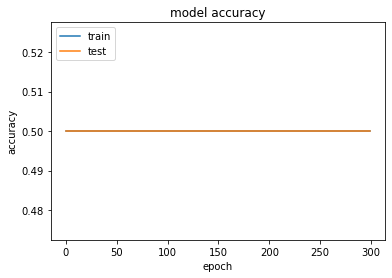

In [30]:
# summarize history for accuracy
plt.plot(hist3.history['val_accuracy'])
plt.plot(hist3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

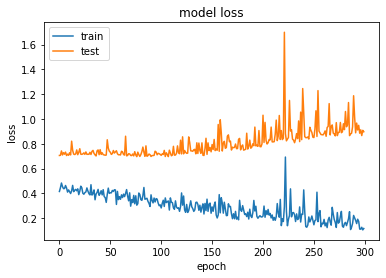

In [31]:
# summarize history for loss
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()